In [4]:
import pandas as pd

test = pd.read_csv('/content/penguins_test.csv')
train = pd.read_csv('/content/penguins_train.csv')

print("Penguins Test Data Head:")
display(test.head())

print("\nPenguins Train Data Head:")
display(train.head())

Penguins Test Data Head:


,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Chinstrap,Dream,50.9,19.1,196.0,3550.0,MALE
1,Chinstrap,Dream,45.2,17.8,198.0,3950.0,FEMALE
2,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE
3,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE
4,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE



Penguins Train Data Head:


,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Biscoe,35.5,16.2,195.0,3350.0,FEMALE
1,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,MALE
2,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
3,Adelie,Dream,40.2,17.1,193.0,3400.0,FEMALE
4,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,MALE


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             69 non-null     object 
 1   Island              69 non-null     object 
 2   Culmen Length(mm)   68 non-null     float64
 3   Culmen Depth(mm)    68 non-null     float64
 4   Flipper Length(mm)  68 non-null     float64
 5   Body Mass(g)        68 non-null     float64
 6   Sex                 67 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.9+ KB


In [8]:
train_x=train.drop(['Body Mass(g)'],axis=1)
train_y=train['Body Mass(g)']
test_x=test.drop(['Body Mass(g)'],axis=1)
test_y=test['Body Mass(g)']

In [15]:
print(train_x.dtypes)

Species                object
Island                 object
Culmen Length(mm)     float64
Culmen Depth(mm)      float64
Flipper Length(mm)    float64
Sex                    object
dtype: object


In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 범주형 변수 원-핫 인코딩
train_x_encoded = pd.get_dummies(train_x, drop_first=True)
test_x_encoded = pd.get_dummies(test_x, drop_first=True)

# 테스트셋 컬럼 순서 train과 맞추기
test_x_encoded = test_x_encoded.reindex(columns=train_x_encoded.columns, fill_value=0)

# 표준화
scaler = StandardScaler()
train_x_s = scaler.fit_transform(train_x_encoded)
test_x_s = scaler.transform(test_x_encoded)

# 확인
print(train_x_s[:5])


[[-1.53131241 -0.4476332  -0.44085976 -0.49179311 -0.76764947 -0.76149961
  -0.39477102 -0.98882646]
 [ 0.52399373 -0.85243612  0.96630768 -0.49179311  1.30267789 -0.76149961
  -0.39477102  1.01129979]
 [-0.85833606  1.27277923 -0.44085976 -0.49179311 -0.76764947 -0.76149961
   2.53311403  1.01129979]
 [-0.67645056  0.00777009 -0.5815765  -0.49179311 -0.76764947  1.31319831
  -0.39477102 -0.98882646]
 [ 0.94233038 -1.05483758  1.88096651 -0.49179311  1.30267789 -0.76149961
  -0.39477102  1.01129979]]


In [21]:
train_y=train_y
test_y=test_y

In [26]:
from tensorflow import keras
from keras import layers
from keras import regularizers

def build_model():
  # Get the number of features from the preprocessed training data
  input_dim = train_x_s.shape[1]
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[input_dim],
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1)
  ])
  return model

In [23]:
model=build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

In [33]:
EPOCHS=100
BATCH_SIZE=32
history=model.fit(train_x_s,train_y,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.2,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4201.3984 - mae: 4201.3203 - mse: 18317828.0000 - val_loss: 4165.7573 - val_mae: 4165.6792 - val_mse: 17948744.0000
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4203.2144 - mae: 4203.1362 - mse: 18399126.0000 - val_loss: 4165.1416 - val_mae: 4165.0630 - val_mse: 17943598.0000
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4179.9546 - mae: 4179.8760 - mse: 18119096.0000 - val_loss: 4164.4448 - val_mae: 4164.3652 - val_mse: 17937756.0000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4212.3823 - mae: 4212.3027 - mse: 18454318.0000 - val_loss: 4163.6123 - val_mae: 4163.5312 - val_mse: 17930750.0000
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4190.6904 - mae: 4190.6084 - mse: 18224510.0000 - val_loss: 4162.5864 - val_mae: 4162.5029 - val_mse: 17922064.0000
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4216.0205 - mae: 4215.9375 - mse: 18467098.0000 - val_loss: 4161.3003 - 

In [29]:
# Rebuild the model with the corrected input shape
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

In [36]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'],hist['val_loss'],label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['mae'],label='Train mae')
  plt.plot(hist['epoch'],hist['val_mae'],label='Val mae')
  plt.legend()

  plt.show()

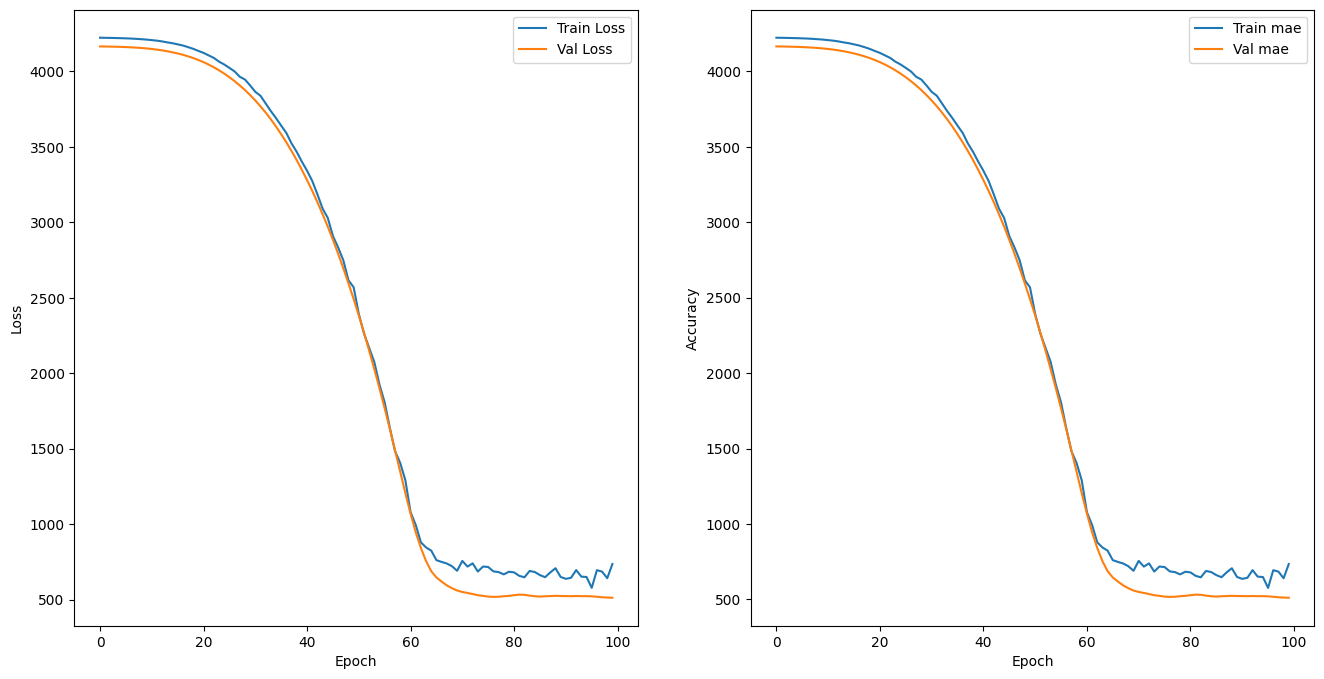

In [37]:
plot_history(history)

In [38]:
loss, mae, mse = model.evaluate(test_x_s, test_y)
print(f"Loss: {loss:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 528.7211 - mae: 526.7997 - mse: 464025.4375
Loss: 528.26, MAE: 526.34, MSE: 459359.91
